# Installing Libraries

In [1]:
from IPython.display import Image,display
import random
import cv2
import yaml
import torch

import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# Getting YOLOv5

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16927, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 16927 (delta 62), reused 86 (delta 47), pack-reused 16805 (from 1)
Receiving objects: 100% (16927/16927), 15.69 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (11595/11595), done.
/kaggle/working/yolov5


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


If you'r using google colab, upload thezip file and unzip it by below command

In [4]:
#!unzip /content/Detection-home.v1i.yolov5pytorch.zip

In [5]:
%%writefile /kaggle/working/data2.yaml

train: /kaggle/input/custom-dataset-yolo/train
val: /kaggle/input/custom-dataset-yolo/valid    
test: /kaggle/input/custom-dataset-yolo/test
    
nc: 3
names: ['Phone', 'Speaker', 'Tarun']

Writing /kaggle/working/data2.yaml


In [6]:
!ls /kaggle/working/

data2.yaml  yolov5


# Training YOLOv5s 

We have small set of data(app 400), So we're using yolov5s (small).

In [7]:
%cd {HOME}
!python /kaggle/working/yolov5/train.py --img 416 --batch 20 --epochs 70 --data /kaggle/working/data2.yaml --cfg yolov5s.yaml --weights 'yolov5s.pt' --cache

/kaggle/working
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/kaggle/working/data2.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=20, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, uplo

# YOLOv5 Training Results Visualization

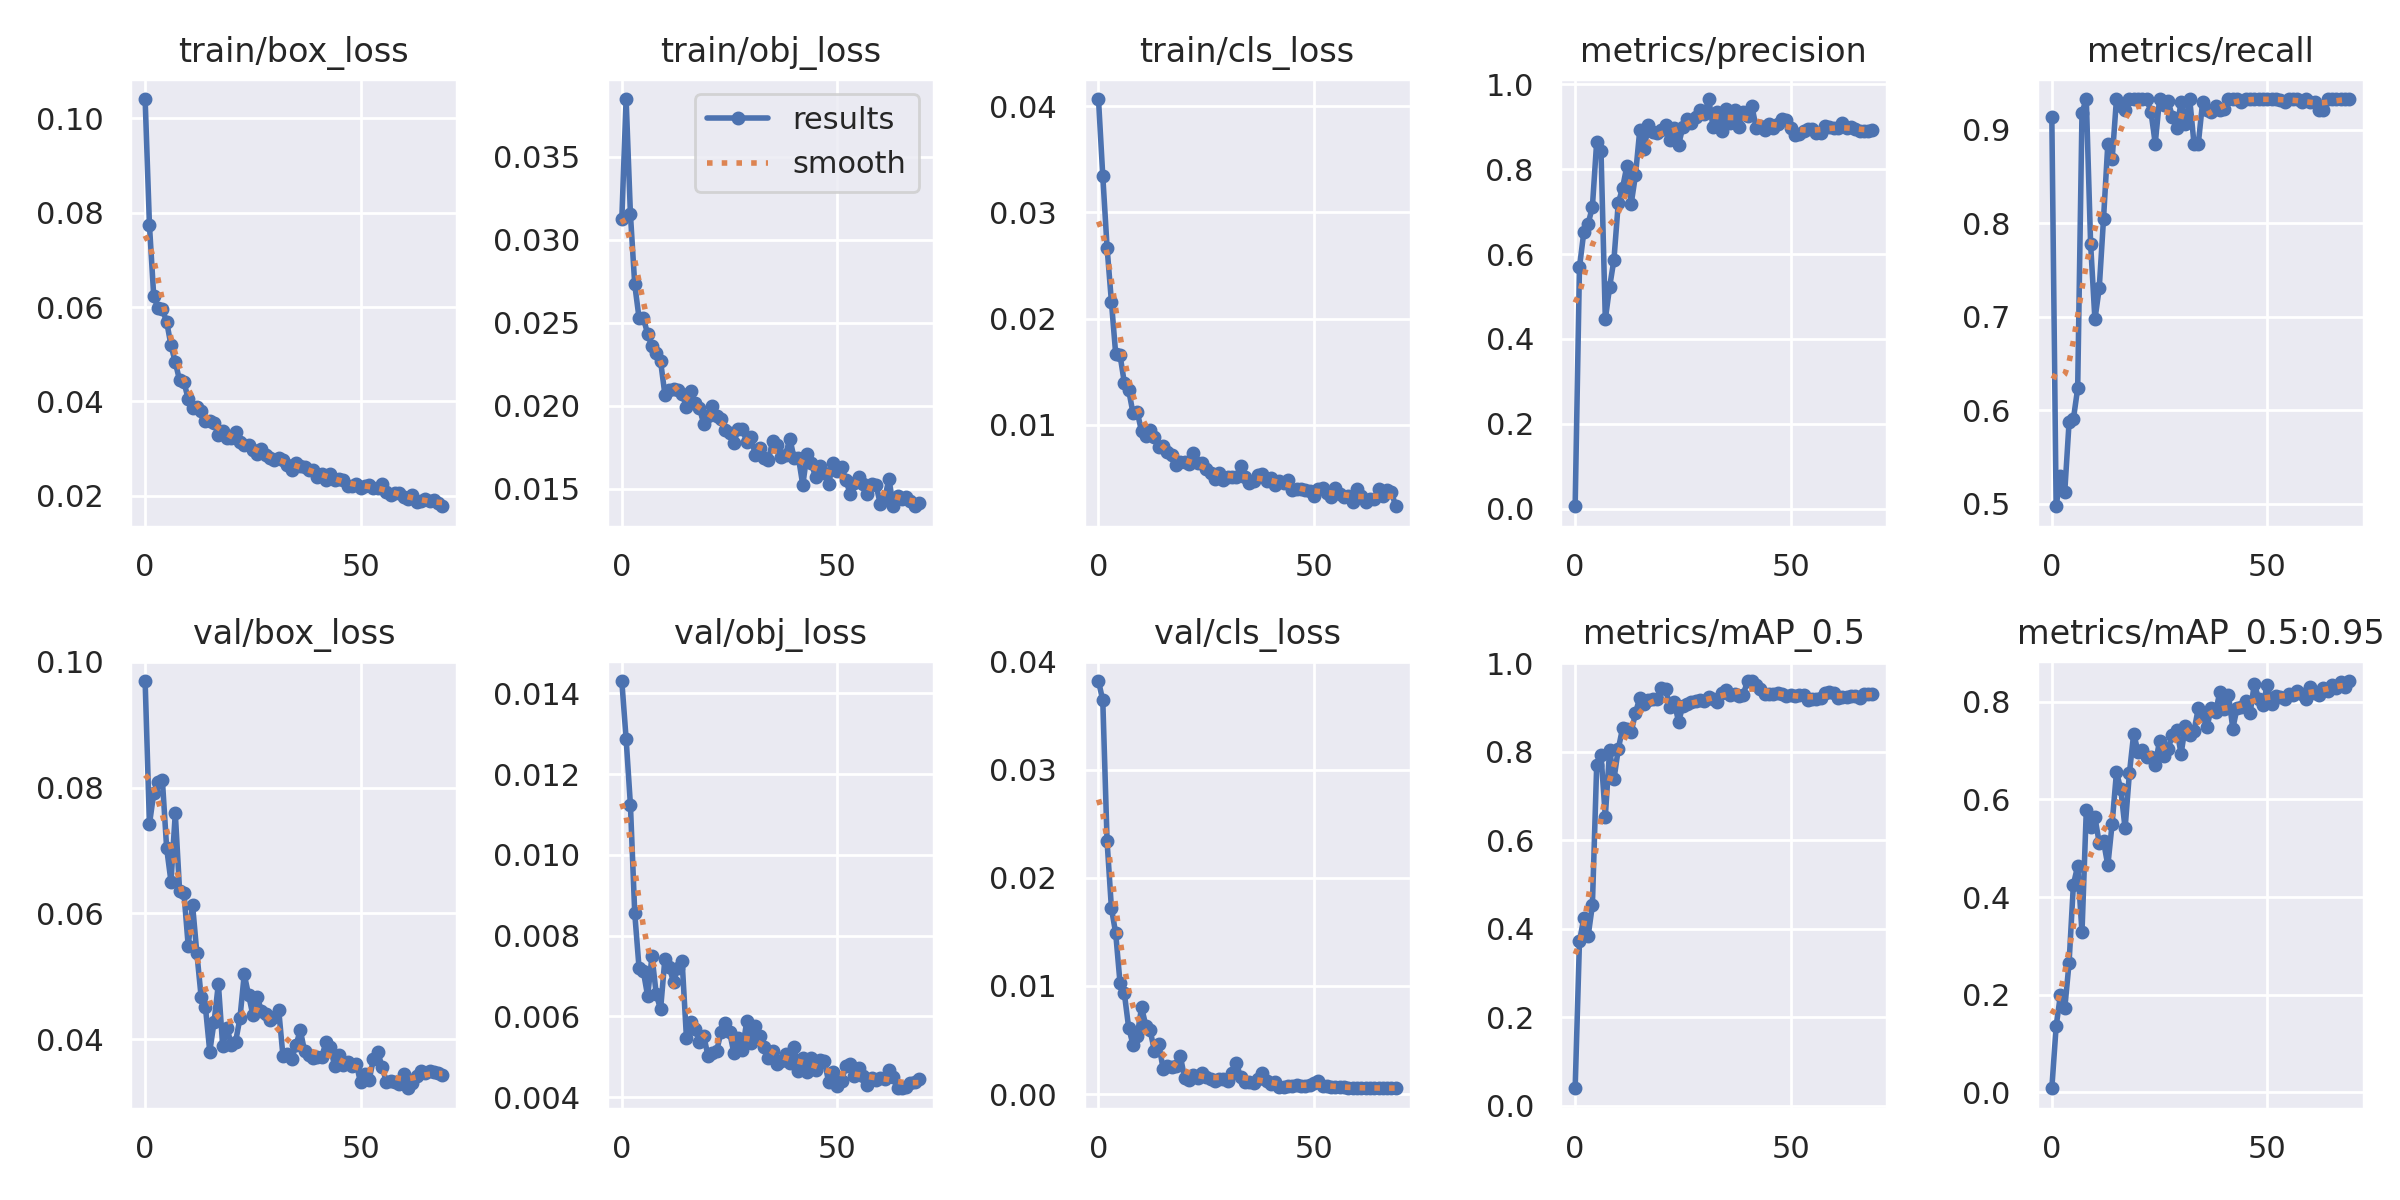

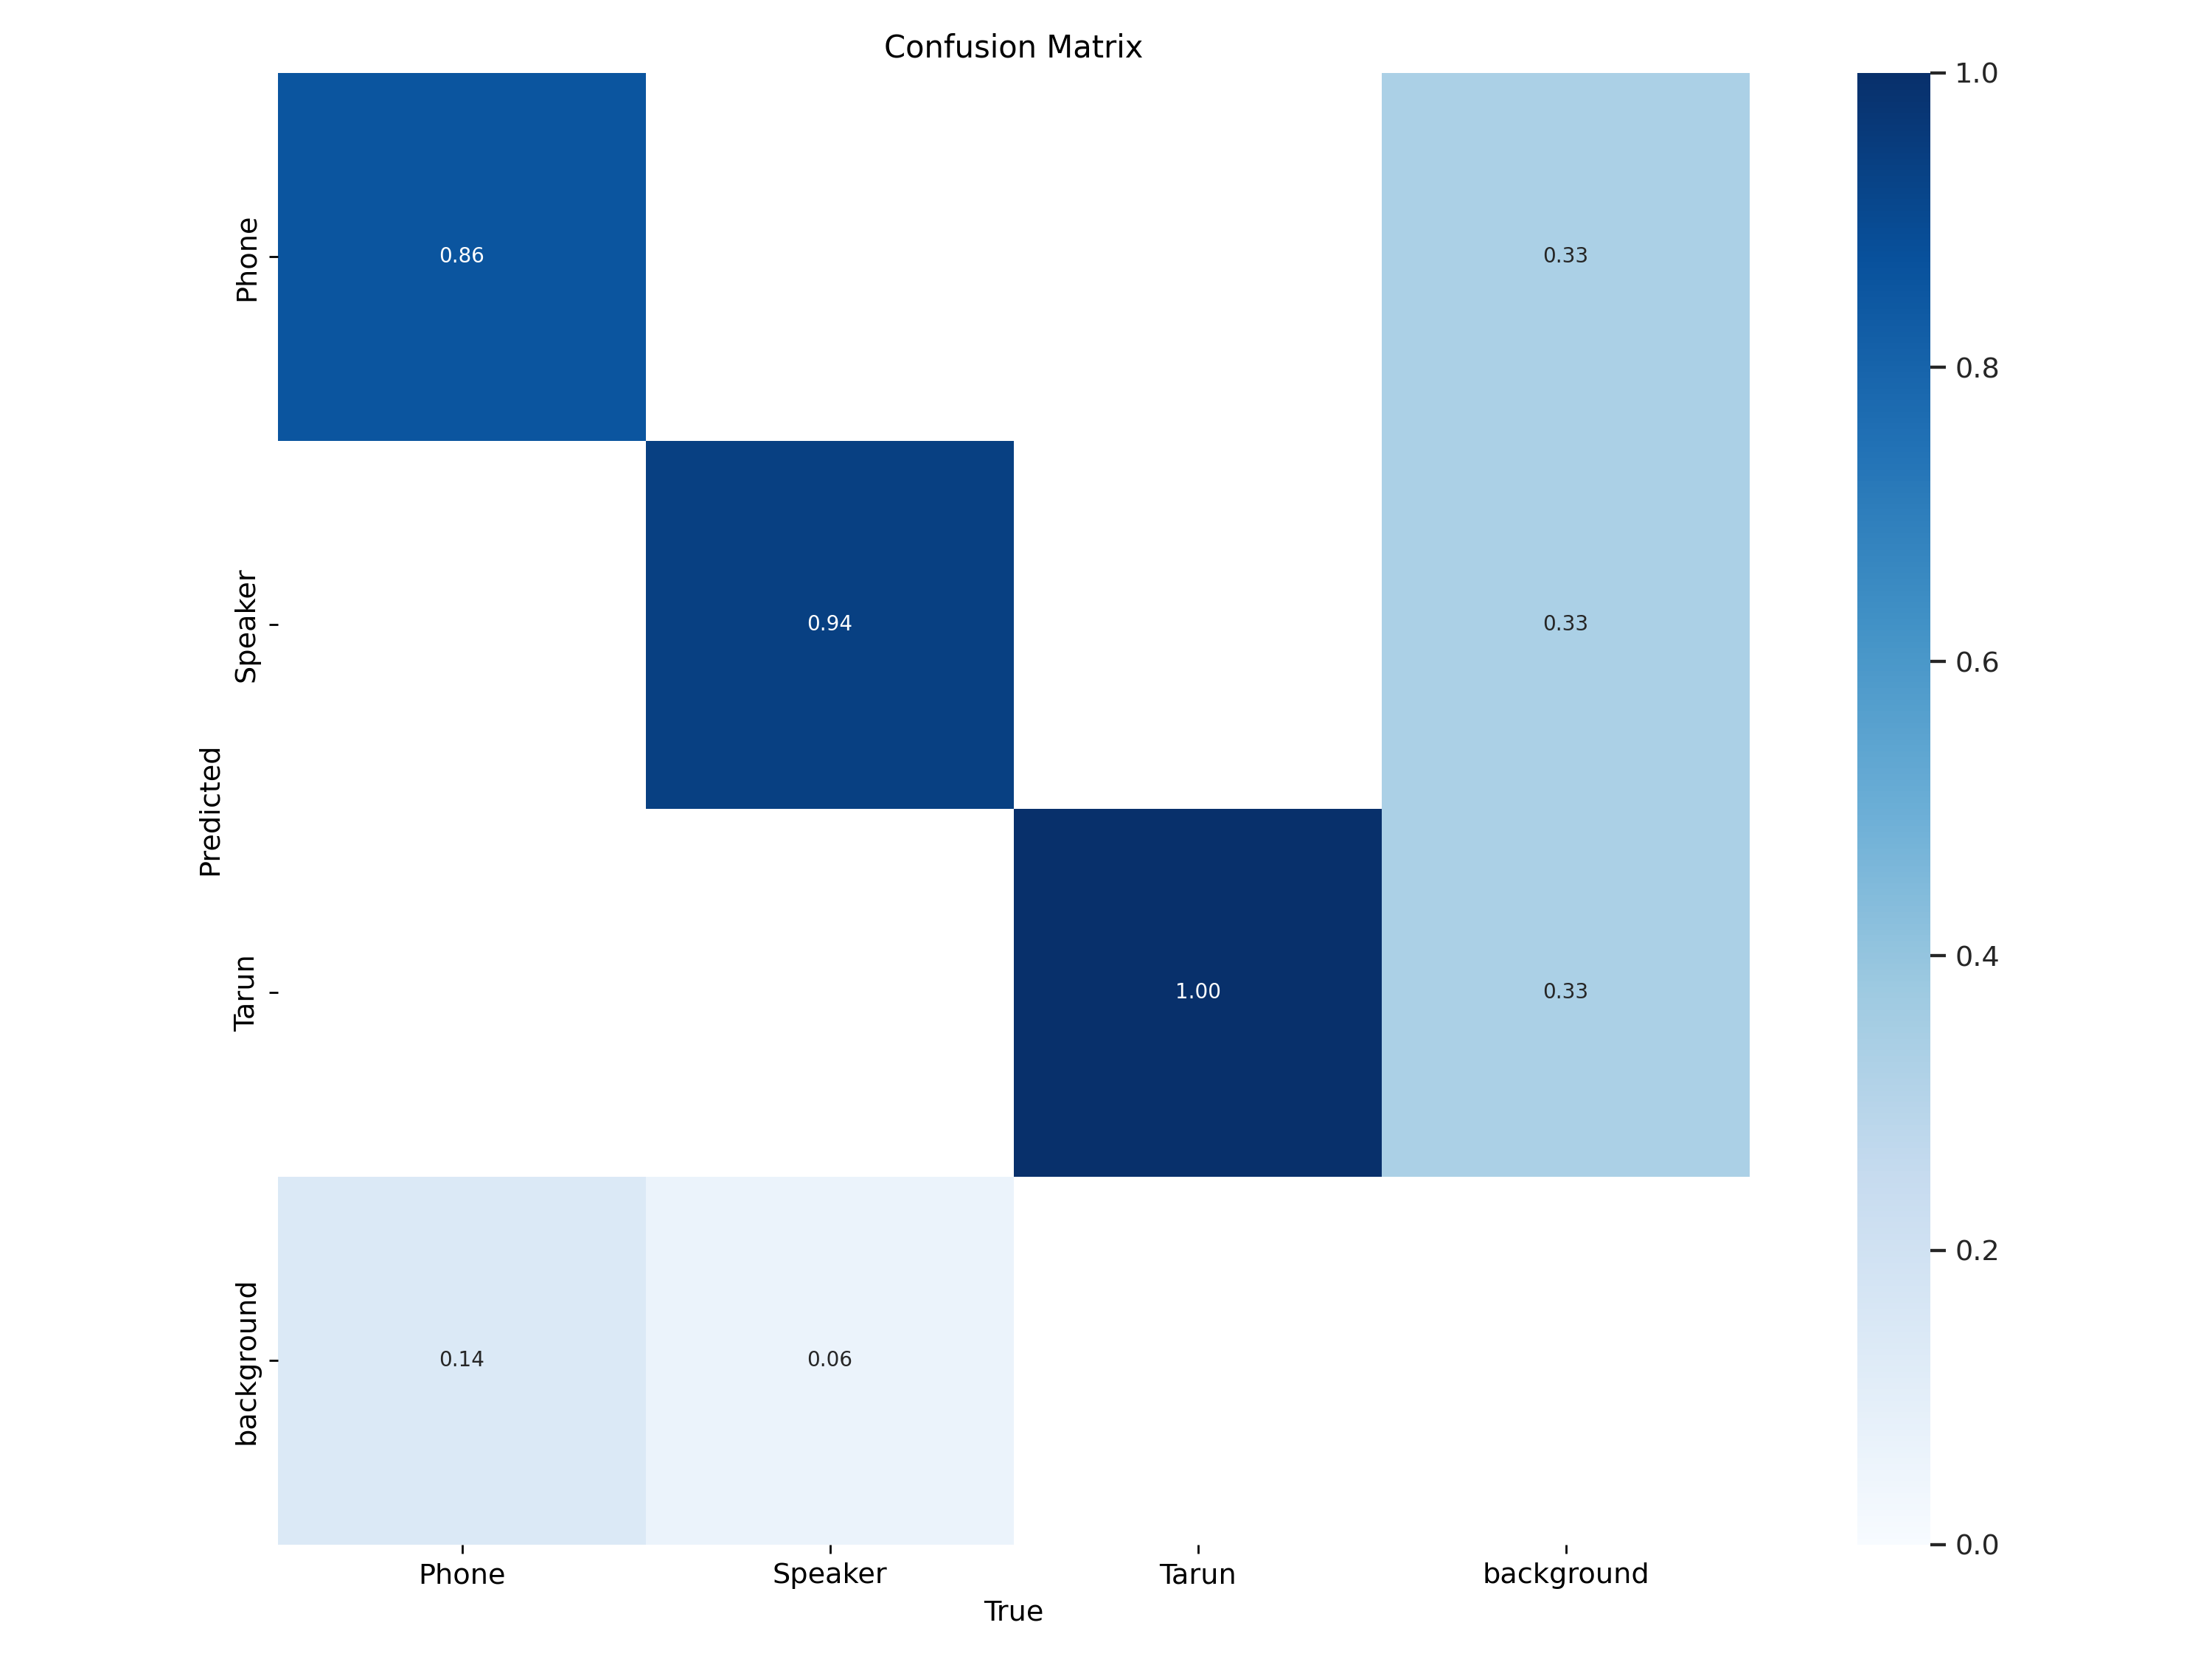

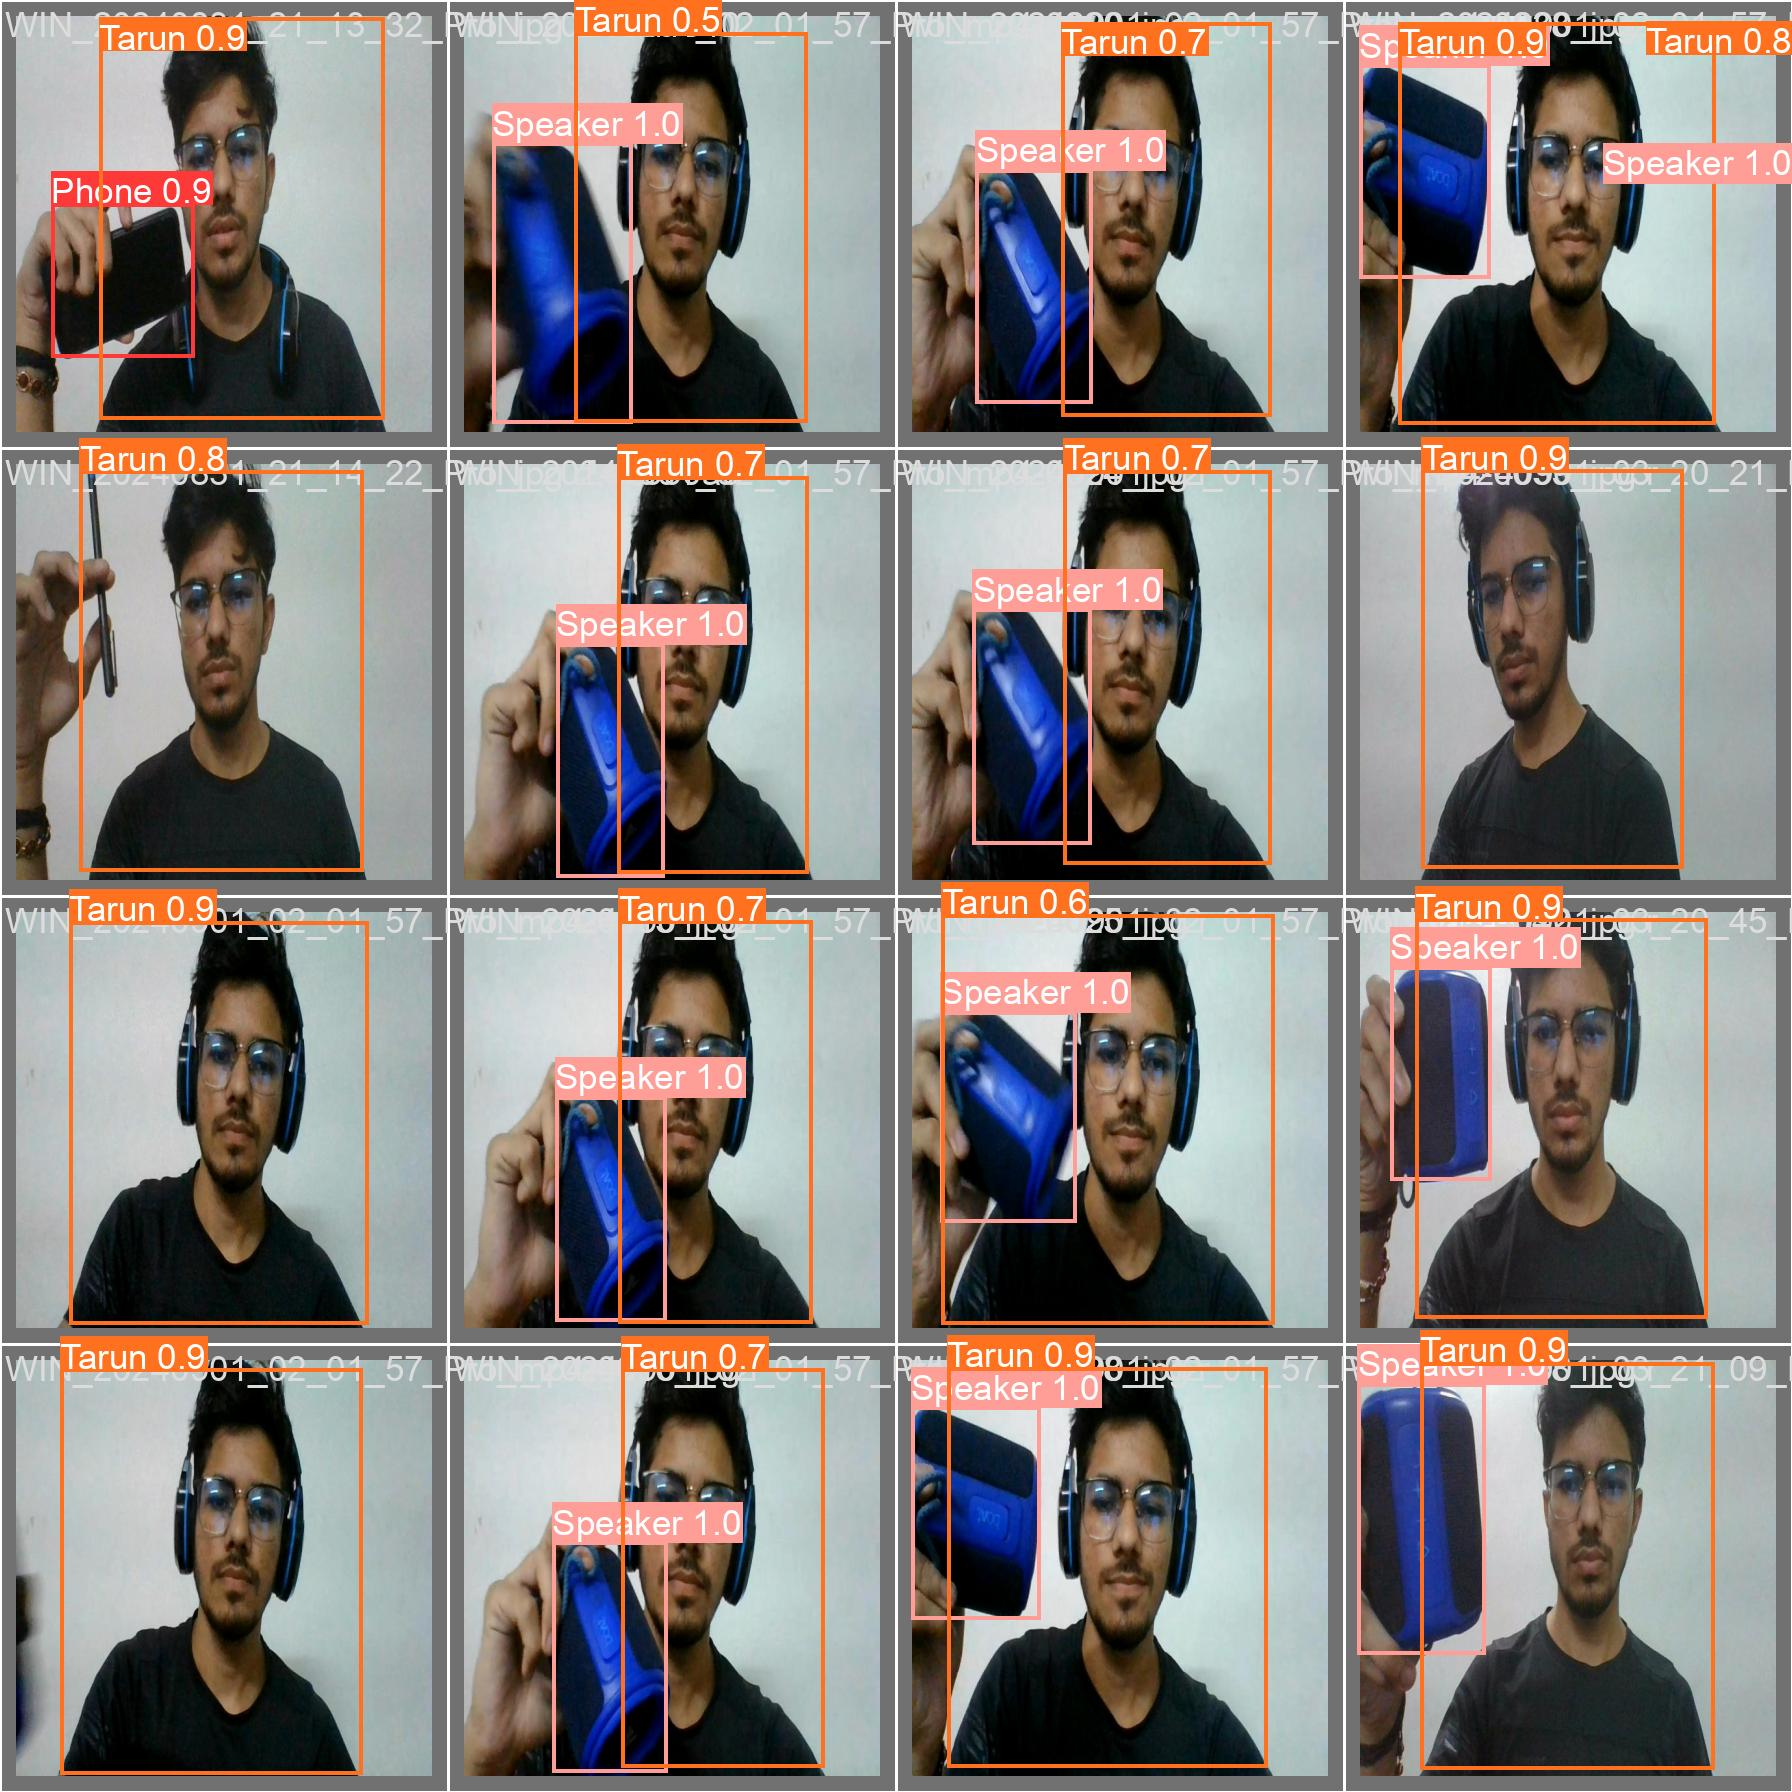

In [14]:
image_paths = [
    '/kaggle/working/yolov5/runs/train/exp/results.png',
    '/kaggle/working/yolov5/runs/train/exp/confusion_matrix.png',
    '/kaggle/working/yolov5/runs/train/exp/val_batch0_pred.jpg' 
]

for path in image_paths:
    display(Image(filename=path, width=1000))

# YOLOv5 Object Detection on Test Images

In [16]:
%cd {HOME}
!python /kaggle/working/yolov5/detect.py --source /kaggle/input/custom-dataset-yolo/test/images  --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.5

/kaggle/working
detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/custom-dataset-yolo/test/images, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /kaggle/input/custom-dataset-yolo/test/images/WIN_20240831_21_13_54_Pro_jpg.rf.db9fc1f7165273bc52f1160a1776d072.jpg: 416x416 1 Tarun, 9.2ms
image 2/15 /kaggle/input/custom-dataset-yolo/test/images/WIN_20240901_02_01_57_Pro_mp4-00

# Displaying Result - Random Sample

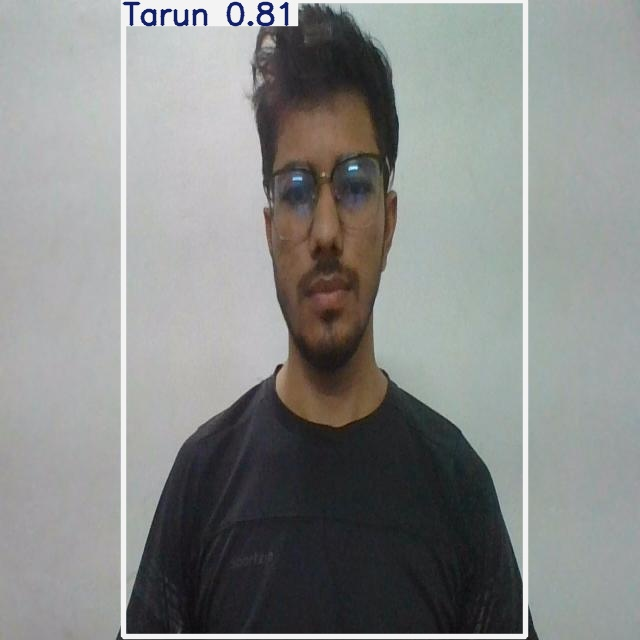

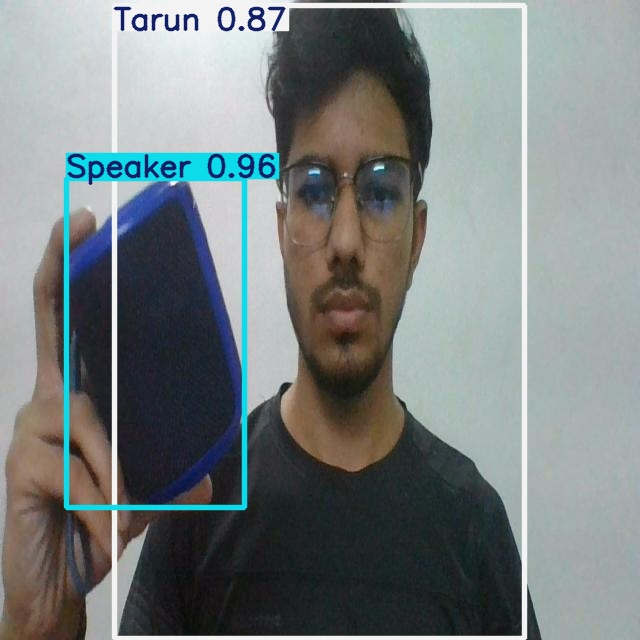

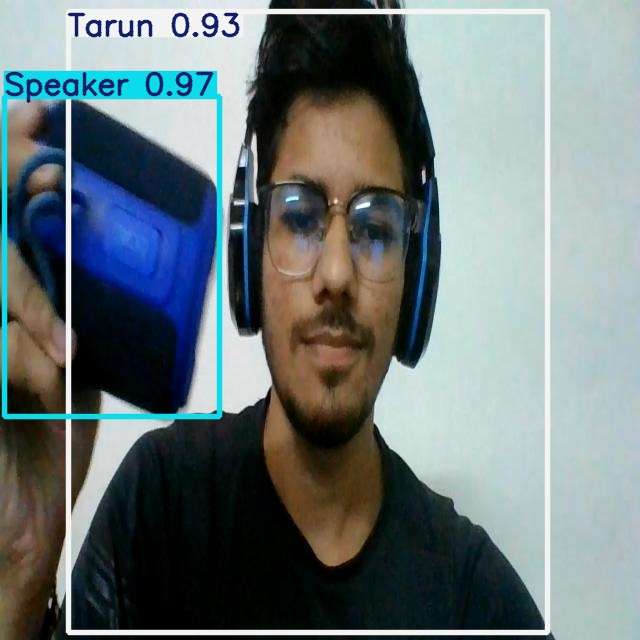

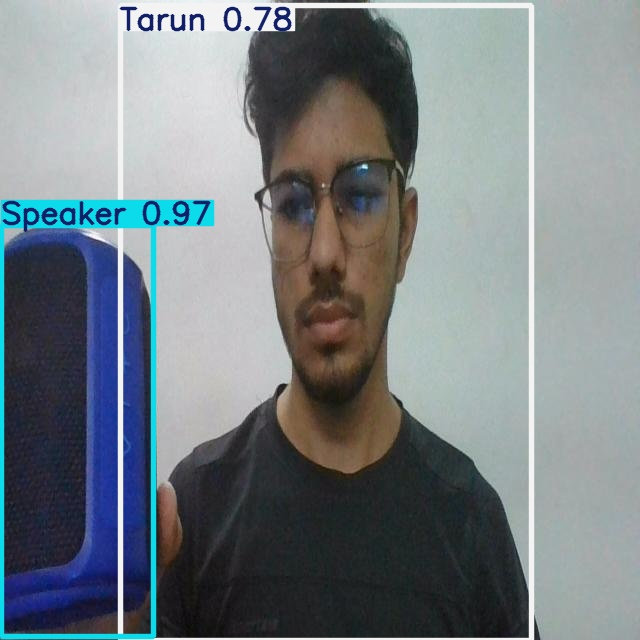

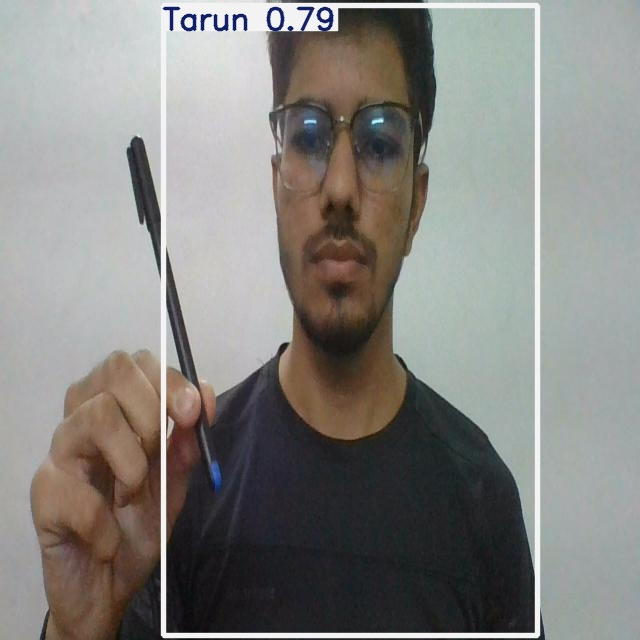

In [21]:
results_dir = '/kaggle/working/yolov5/runs/detect/exp2'
all_image_files = [f for f in os.listdir(results_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

random_images = random.sample(all_image_files, 5) 
image_paths = [os.path.join(results_dir, img) for img in random_images]

for path in image_paths:
    display(Image(filename=path, width=500))

# Now Test Video

In [22]:
%cd {HOME}
!python /kaggle/working/yolov5/detect.py --source /kaggle/input/test-video --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.5

/kaggle/working
detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/test-video, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/549) /kaggle/input/test-video/WIN_20240901_20_12_09_Pro.mp4: 256x416 1 Tarun, 30.1ms
video 1/1 (2/549) /kaggle/input/test-video/WIN_20240901_20_12_09_Pro.mp4: 256x416 1 Tarun, 6.6ms
video 1/1 (3/549) /kaggle/input/test-video/WIN_20240901_20_12_09_P

# Done :)